# Install Dependencies Part I

In [1]:
# pip show transformers

!pip uninstall -y transformers
!pip install git+https://github.com/huggingface/transformers

Found existing installation: transformers 4.42.0.dev0
Uninstalling transformers-4.42.0.dev0:
  Successfully uninstalled transformers-4.42.0.dev0
  Cloning https://github.com/huggingface/transformers to c:\users\royle\appdata\local\temp\pip-req-build-32dos1uh
  Resolved https://github.com/huggingface/transformers to commit 2505357e4fdea82d1586b8c0862b4eeb46fac457
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for transformers: filename=transformers-4.42.0.dev0-py3-none-any.whl size=9164189 sha256=e979b29f2411a6a4b7c4ee456876d72c428fa6c1a8a7a002d5a0821cbb90f019
  Stored in directory: C:\Use

  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers 'C:\Users\royle\AppData\Local\Temp\pip-req-build-32dos1uh'


In [16]:
!pip install --upgrade tf-keras

In [11]:
!pip install --upgrade pip jupyter ipywidgets accelerate einops transformers tensorflow
!pip install -q datasets evaluate 
!pip install -q torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cpu

In [1]:
# Get SSIC Ref table

import pandas as pd
import os

# Get current directory
current_dir = os.getcwd()
# Get parent directory
parent_dir = os.path.dirname(current_dir)

ssic_detailed_def_filename = "ssic2020-detailed-definitions.xlsx"
ssic_alpha_index_filename = "ssic2020-alphabetical-index.xlsx"

# Define the relative path to the CSV file
ssic_detailed_def_filepath = os.path.join(parent_dir, ssic_detailed_def_filename)
ssic_alpha_index_filepath = os.path.join(parent_dir, ssic_alpha_index_filename)

df_detailed_def = pd.read_excel(ssic_detailed_def_filepath, skiprows=4)
df_alpha_index = pd.read_excel(ssic_alpha_index_filepath, dtype=str, skiprows=5)
df_alpha_index = df_alpha_index.drop(df_alpha_index.columns[2], axis=1).dropna().rename(columns={'SSIC 2020': 'SSIC 2020','SSIC 2020 Alphabetical Index Description': 'Detailed Definitions'})

df = pd.concat([df_detailed_def, df_alpha_index])

# Prep SSIC ref-join tables
# Section, 1-alpha 
ssic_1_raw = df[df['SSIC 2020'].apply(lambda x: len(str(x)) == 1)].reset_index(drop=True).drop(columns=['Detailed Definitions', 'Cross References', 'Examples of Activities Classified Under this Code']) 
ssic_1_raw['Groups Classified Under this Code'] = ssic_1_raw['Groups Classified Under this Code'].str.split('\n•')
ssic_1 = ssic_1_raw.explode('Groups Classified Under this Code').reset_index(drop=True)
ssic_1['Groups Classified Under this Code'] = ssic_1['Groups Classified Under this Code'].str.replace('•', '')
ssic_1['Section, 2 digit code'] = ssic_1['Groups Classified Under this Code'].str[0:2]
ssic_1 = ssic_1.rename(columns={'SSIC 2020': 'Section','SSIC 2020 Title': 'Section Title'})

# Division, 2-digit
ssic_2_raw = df[df['SSIC 2020'].apply(lambda x: len(str(x)) == 2)].reset_index(drop=True).drop(columns=['Detailed Definitions', 'Cross References', 'Examples of Activities Classified Under this Code'])
ssic_2_raw['Groups Classified Under this Code'] = ssic_2_raw['Groups Classified Under this Code'].str.split('\n•')
ssic_2 = ssic_2_raw.explode('Groups Classified Under this Code').reset_index(drop=True)
ssic_2['Groups Classified Under this Code'] = ssic_2['Groups Classified Under this Code'].str.replace('•', '')
ssic_2 = ssic_2.rename(columns={'SSIC 2020': 'Division','SSIC 2020 Title': 'Division Title'}).drop(columns=['Groups Classified Under this Code']).drop_duplicates()

# Group, 3-digit 
ssic_3_raw = df[df['SSIC 2020'].apply(lambda x: len(str(x)) == 3)].reset_index(drop=True).drop(columns=['Detailed Definitions', 'Cross References', 'Examples of Activities Classified Under this Code'])
ssic_3_raw['Groups Classified Under this Code'] = ssic_3_raw['Groups Classified Under this Code'].str.split('\n•')
ssic_3 = ssic_3_raw.explode('Groups Classified Under this Code').reset_index(drop=True)
ssic_3['Groups Classified Under this Code'] = ssic_3['Groups Classified Under this Code'].str.replace('•', '')
ssic_3 = ssic_3.rename(columns={'SSIC 2020': 'Group','SSIC 2020 Title': 'Group Title'}).drop(columns=['Groups Classified Under this Code']).drop_duplicates()

# Class, 4-digit
ssic_4_raw = df[df['SSIC 2020'].apply(lambda x: len(str(x)) == 4)].reset_index(drop=True).drop(columns=['Detailed Definitions', 'Cross References', 'Examples of Activities Classified Under this Code'])
ssic_4_raw['Groups Classified Under this Code'] = ssic_4_raw['Groups Classified Under this Code'].str.split('\n•')
ssic_4 = ssic_4_raw.explode('Groups Classified Under this Code').reset_index(drop=True)
ssic_4['Groups Classified Under this Code'] = ssic_4['Groups Classified Under this Code'].str.replace('•', '')
ssic_4 = ssic_4.rename(columns={'SSIC 2020': 'Class','SSIC 2020 Title': 'Class Title'}).drop(columns=['Groups Classified Under this Code']).drop_duplicates()

# Sub-class, 5-digit
ssic_5 = df[df['SSIC 2020'].apply(lambda x: len(str(x)) == 5)].reset_index(drop=True).drop(columns=['Groups Classified Under this Code'])
ssic_5.replace('<Blank>', '', inplace=True)
ssic_5.replace('NaN', '', inplace=True)

# Prep join columns
ssic_5['Section, 2 digit code'] = ssic_5['SSIC 2020'].astype(str).str[:2]
ssic_5['Division'] = ssic_5['SSIC 2020'].astype(str).str[:2]
ssic_5['Group'] = ssic_5['SSIC 2020'].astype(str).str[:3]
ssic_5['Class'] = ssic_5['SSIC 2020'].astype(str).str[:4]

# Join ssic_5 to Hierarhical Layer Tables (Section, Division, Group, Class, Sub-Class)
ssic_df = pd.merge(ssic_5, ssic_1[['Section', 'Section Title', 'Section, 2 digit code']], on='Section, 2 digit code', how='left')
ssic_df = pd.merge(ssic_df, ssic_2[['Division', 'Division Title']], on='Division', how='left')
ssic_df = pd.merge(ssic_df, ssic_3[['Group', 'Group Title']], on='Group', how='left')
ssic_df = pd.merge(ssic_df, ssic_4[['Class', 'Class Title']], on='Class', how='left')


# ssic_df prep for model

# Inspect tables
# ssic_5.head(5)
# ssic_df
# ssic_df.to_excel('SSIC Fact Ref Table.xlsx', index=False)

# Reference Table for all SSIC Layers
ref_df = df_detailed_def[['SSIC 2020','SSIC 2020 Title']]
ref_df.drop_duplicates(inplace=True)

ssic_5

# # Query SSIC
# ssic_query_list = ['46900', '64202', '70201', '62011', '62021']
# filtered_df = ssic_df[ssic_df['SSIC 2020'].isin(ssic_query_list)]
# filtered_df.iloc[:, [0, 1, 9, 10, 11, 12, 13]].drop_duplicates()


C:\Users\royle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'SSIC2020 Detailed Definitions'!$A:$E.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\royle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\royle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\royle\AppData\Local\Temp\ipykernel_265

,SSIC 2020,SSIC 2020 Title,Detailed Definitions,Cross References,Examples of Activities Classified Under this Code,"Section, 2 digit code",Division,Group,Class
0,01111,Growing of leafy and fruit vegetables,This sub-class includes the cultivation of lea...,"•growing of mushrooms, see 01112\n•growing of ...",,01,01,011,0111
1,01112,Growing of mushrooms,This sub-class includes the cultivation of mus...,•growing of leafy and fruit vegetables (non-hy...,,01,01,011,0111
2,01113,Growing of root crops,This sub-class includes the cultivation of roo...,•growing of leafy and fruit vegetables (non-hy...,,01,01,011,0111
3,01119,Growing of food crops (non-hydroponics) n.e.c.,This sub-class includes the propagation of foo...,•growing of leafy and fruit vegetables (non-hy...,•cereals growing (non-hydroponics)\n•rice grow...,01,01,011,0111
4,01120,Growing of leafy and fruit vegetables (hydropo...,This sub-class includes the cultivation of lea...,•growing of leafy and fruit vegetables (non-hy...,,01,01,011,0112
...,...,...,...,...,...,...,...,...,...
11842,97002,NaN,Employer of secretary (private household),NaN,NaN,97,97,970,9700
11843,99010,NaN,Foreign embassy,NaN,NaN,99,99,990,9901
11844,99010,NaN,Foreign government trade representative office,NaN,NaN,99,99,990,9901
11845,99020,NaN,Foreign armed force base,NaN,NaN,99,99,990,9902


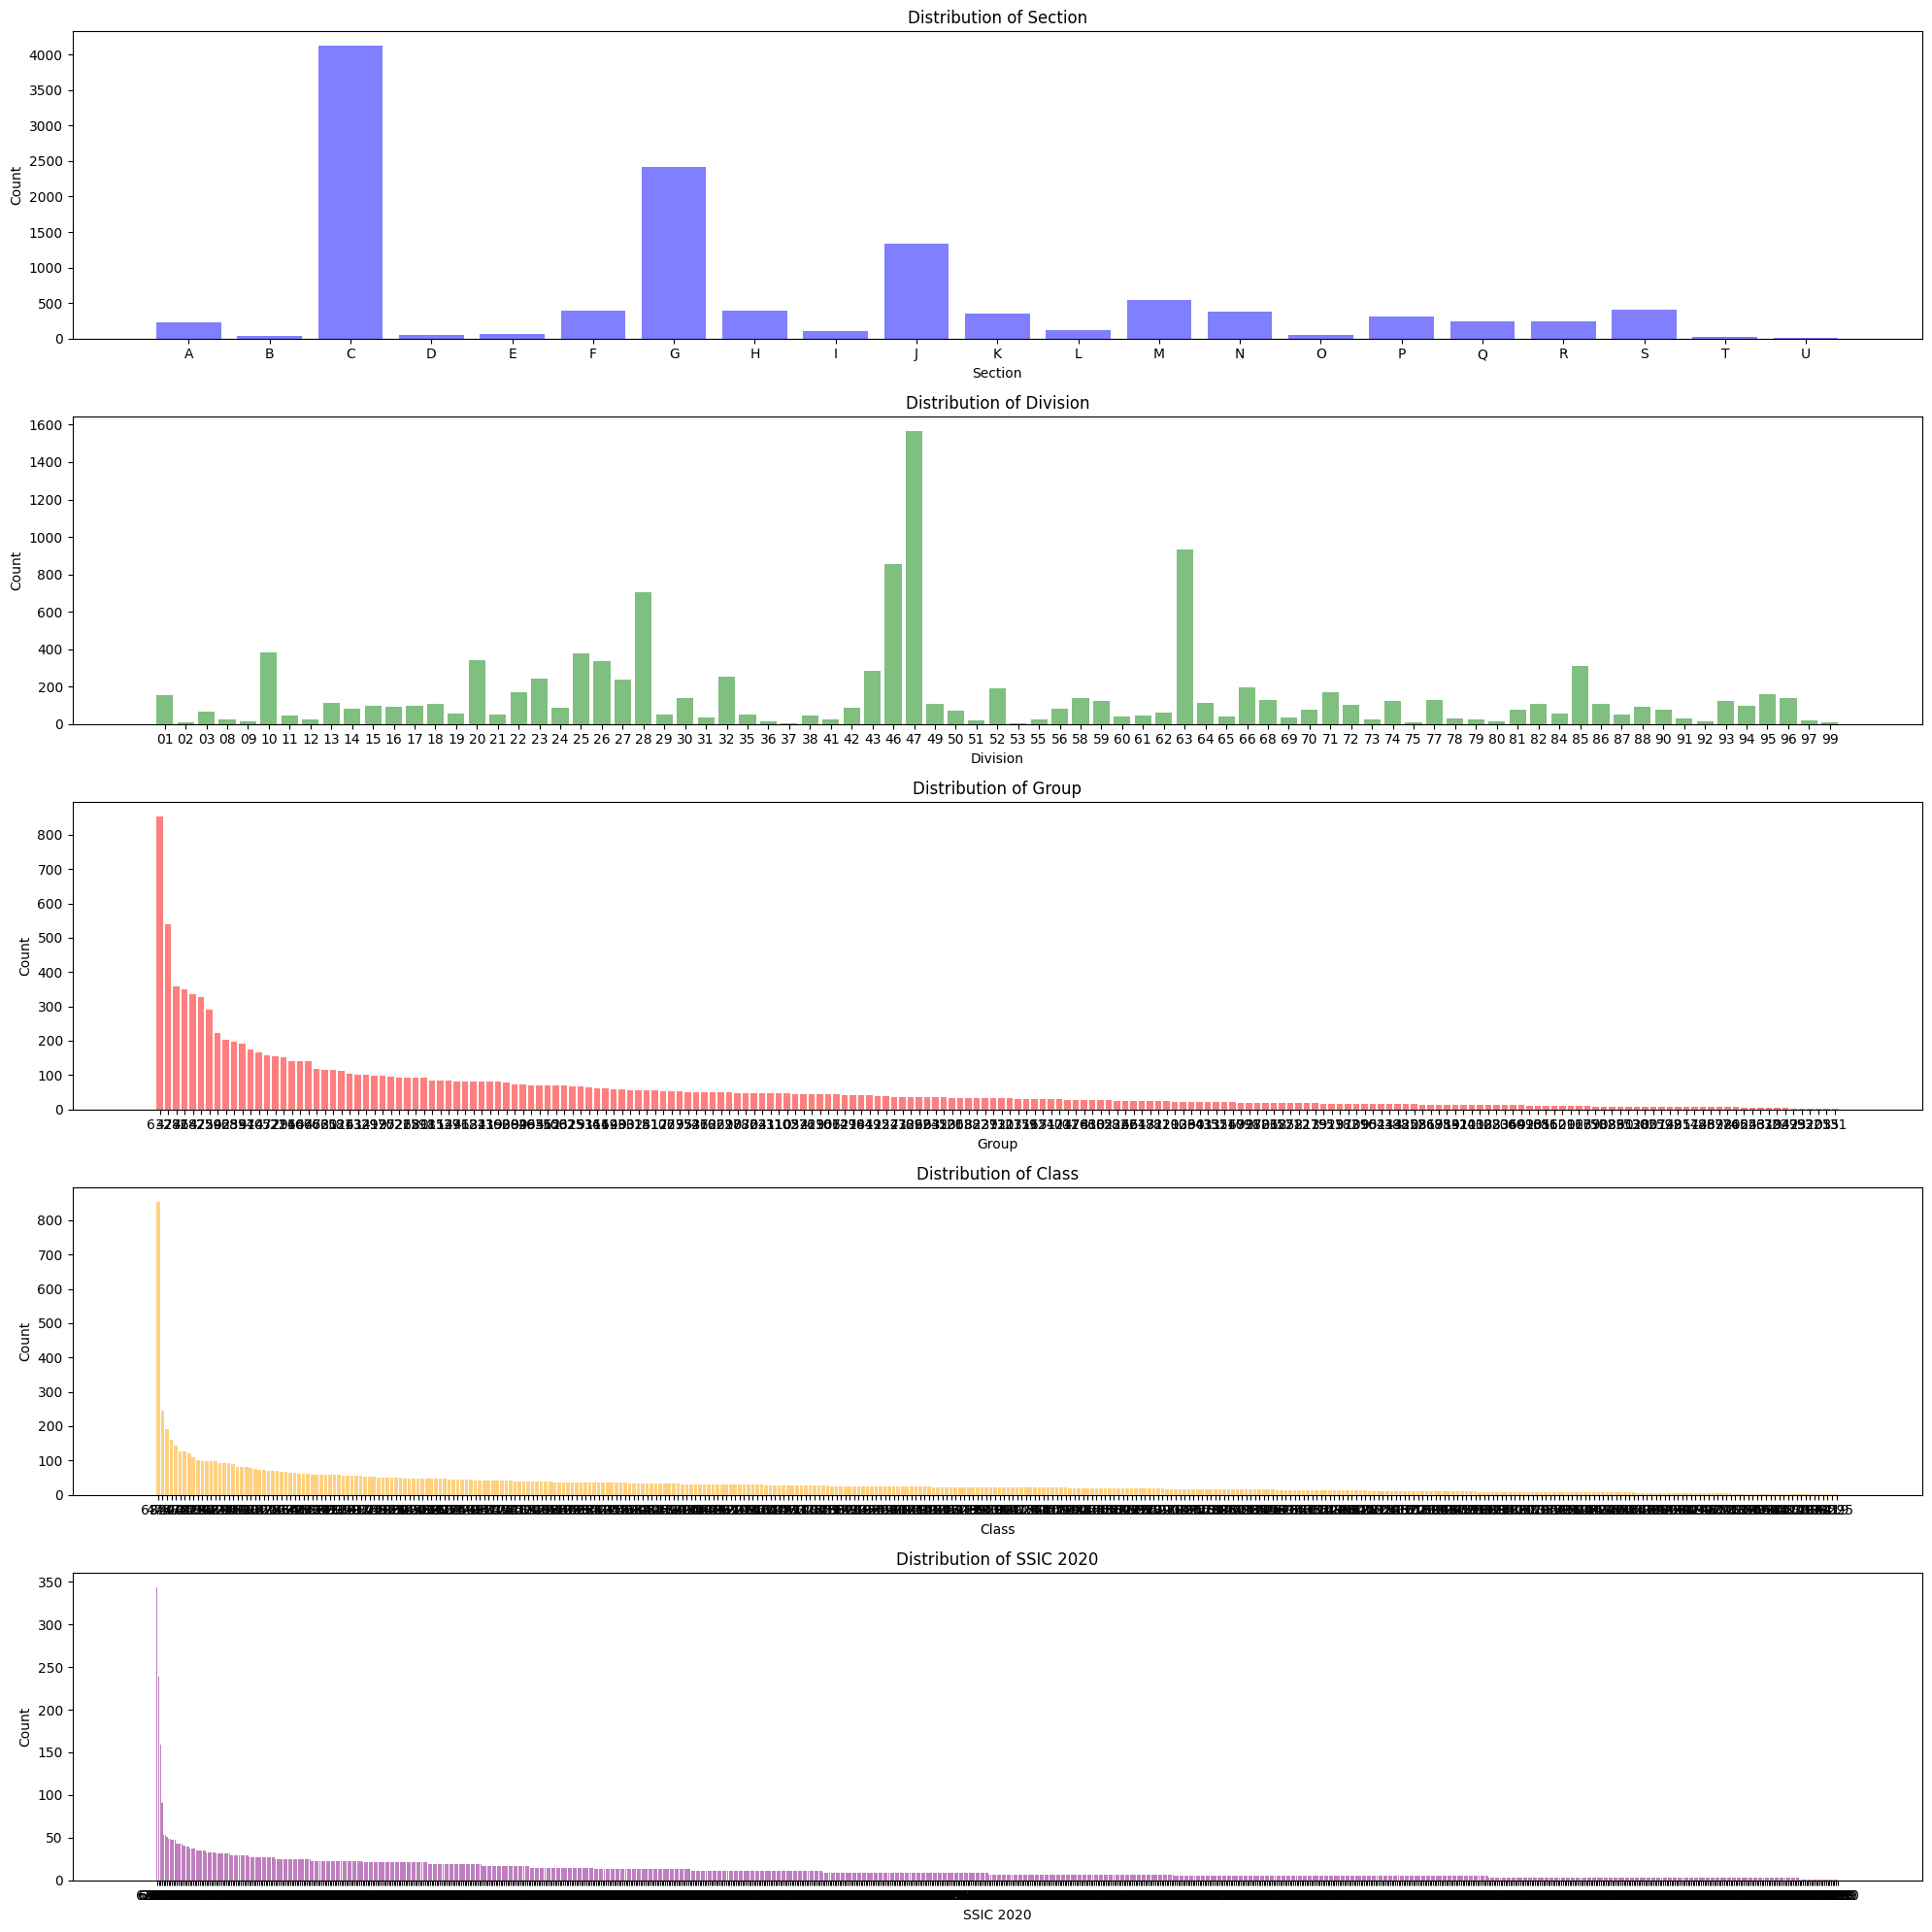

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Get count of each unique value in the 'Section' column
section_counts = ssic_df['Section'].value_counts().sort_index() # toggle .sort_index() for sorting by label or count
division_counts = ssic_df['Division'].value_counts().sort_index()
group_counts = ssic_df['Group'].value_counts()
class_counts = ssic_df['Class'].value_counts()
ssic_counts = ssic_df['SSIC 2020'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 20))

# Plot each bar chart
axes[0].bar(section_counts.index, section_counts.values, alpha=0.5, color='blue')
axes[0].set_title('Distribution of Section')
axes[0].set_xlabel('Section')
axes[0].set_ylabel('Count')

axes[1].bar(division_counts.index, division_counts.values, alpha=0.5, color='green')
axes[1].set_title('Distribution of Division')
axes[1].set_xlabel('Division')
axes[1].set_ylabel('Count')

axes[2].bar(group_counts.index, group_counts.values, alpha=0.5, color='red')
axes[2].set_title('Distribution of Group')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Count')

axes[3].bar(class_counts.index, class_counts.values, alpha=0.5, color='orange')
axes[3].set_title('Distribution of Class')
axes[3].set_xlabel('Class')
axes[3].set_ylabel('Count')

axes[4].bar(ssic_counts.index, ssic_counts.values, alpha=0.5, color='purple')
axes[4].set_title('Distribution of SSIC 2020')
axes[4].set_xlabel('SSIC 2020')
axes[4].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [6]:
# df prep for model (Section)

df_prep = ssic_df[['Section', 'Detailed Definitions']]
df_prep['encoded_cat'] = df_prep['Section'].astype('category').cat.codes

data_texts = df_prep['Detailed Definitions'].to_list() # Features (not tokenized yet)
data_labels = df_prep['encoded_cat'].to_list() # Labels

df_prep = df_prep[['Section', 'encoded_cat']].drop_duplicates()
df_prep

C:\Users\royle\AppData\Local\Temp\ipykernel_13092\1361023984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['encoded_cat'] = df_prep['Section'].astype('category').cat.codes


,Section,encoded_cat
0,A,0
32,B,1
37,C,2
392,D,3
400,E,4
406,F,5
447,G,6
615,H,7
668,I,8
680,J,9


In [202]:
# https://nilg.ai/202308/classifying-text-using-llms/

##################
# LLM DistilBert #
##################

# DistilBERT for Multiclass Text Classification Using Transformers - https://medium.com/@kiddojazz/distilbert-for-multiclass-text-classification-using-transformers-d6374e6678ba
# Hugging Face Link - https://huggingface.co/distilbert/distilbert-base-uncased

In [7]:
from sklearn.model_selection import train_test_split
 
# Split Train and Validation data
# train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size=0.2, random_state=0, shuffle=True)

# 100% of Data for training
train_texts = data_texts
train_labels = data_labels
val_texts = data_texts
val_labels = data_labels
 
# Keep some data for inference (testing)
train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size=0.01, random_state=0, shuffle=True)


In [8]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
import tensorflow as tf
import pandas as pd

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [9]:
# Create TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings),val_labels))

# TFTrainer Class for Fine-tuning
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=21)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [2]:
# from tensorflow.keras.callbacks import EarlyStopping
 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
 
model.fit(train_dataset.shuffle(1000).batch(16),
epochs=2,
batch_size=16,
validation_data=val_dataset.shuffle(1000).batch(16),
# callbacks=[early_stopping]
)

NameError: name 'tf' is not defined

In [19]:
# Save model into folder w timestamp

from datetime import datetime
current_date = datetime.now().strftime("%d%m%y")

current_dir = os.getcwd()
# Define new folder name
new_folder_name = "distilBert Text Multiclass by 21 Sections caa " +  current_date

# Create the new folder path
new_folder_path = os.path.join(current_dir, new_folder_name)

# Create the new folder if it doesn't already exist
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
    print(f"Folder '{new_folder_name}' created in {current_dir}")
else:
    print(f"Folder '{new_folder_name}' already exists in {current_dir}")

from tensorflow.keras.models import load_model
model.save_pretrained(new_folder_path)
tokenizer.save_pretrained(new_folder_path)

Folder 'distilBert Text Multiclass by 21 Sections caa 190624' created in c:\Users\royle\OneDrive\Desktop\GitHub\ssicsync\LLM_Test


('c:\\Users\\royle\\OneDrive\\Desktop\\GitHub\\ssicsync\\LLM_Test\\distilBert Text Multiclass by 21 Sections caa 190624\\tokenizer_config.json',
 'c:\\Users\\royle\\OneDrive\\Desktop\\GitHub\\ssicsync\\LLM_Test\\distilBert Text Multiclass by 21 Sections caa 190624\\special_tokens_map.json',
 'c:\\Users\\royle\\OneDrive\\Desktop\\GitHub\\ssicsync\\LLM_Test\\distilBert Text Multiclass by 21 Sections caa 190624\\vocab.txt',
 'c:\\Users\\royle\\OneDrive\\Desktop\\GitHub\\ssicsync\\LLM_Test\\distilBert Text Multiclass by 21 Sections caa 190624\\added_tokens.json')

In [25]:
!pip install -q transformers datasets evaluate accelerate
!pip install -q tensorflow
!pip install -q torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cpu

# Load model and test

from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
import pandas as pd

save_directory = "distilBert Text Multiclass by 21 Sections caa 060624"
loaded_tokenizer = DistilBertTokenizer.from_pretrained(save_directory)
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

# Remember to load these 2 cells!!!
# ssic_def prep for model
# df prep for model

Some layers from the model checkpoint at distilBert Text Multiclass by 21 Sections caa 060624 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_239']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilBert Text Multiclass by 21 Sections caa 060624 and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
import pandas as pd

def assemble_file(file_path, chunk_count):
    with open(file_path, 'wb') as output_file:
        for i in range(chunk_count):
            chunk_file_path = f"{file_path}.part{i}"
            with open(chunk_file_path, 'rb') as chunk_file:
                output_file.write(chunk_file.read())

new_folder_path = "C:/Users/royle/OneDrive/Desktop/GitHub/ssicsync/distilBert Text Multiclass by 21 Sections caa 120624"

# Number of chunks for each file
model_chunk_count = len([name for name in os.listdir(new_folder_path) if 'pytorch_model.bin.part' in name])
tokenizer_chunk_count = len([name for name in os.listdir(new_folder_path) if 'tokenizer_config.json.part' in name])

# Define the paths to your model files
assembled_model_file_path = os.path.join(new_folder_path, 'pytorch_model.bin')
assembled_tokenizer_file_path = os.path.join(new_folder_path, 'tokenizer_config.json')

# Assemble the model files from chunks
assemble_file(assembled_model_file_path, model_chunk_count)
assemble_file(assembled_tokenizer_file_path, tokenizer_chunk_count)

In [21]:
!pip install -q transformers datasets evaluate accelerate
!pip install -q tensorflow
!pip install -q torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cpu

# Load model and test

from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
import pandas as pd

save_directory = "distilBert Text Multiclass by 21 Sections caa 190624"
loaded_tokenizer = DistilBertTokenizer.from_pretrained(save_directory)
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

Some layers from the model checkpoint at distilBert Text Multiclass by 21 Sections caa 190624 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilBert Text Multiclass by 21 Sections caa 190624 and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
# Test

# specializes in the opening and management of diverse food outlets, aiming to create unique dining experiences while maintaining high standards of quality and service

# provides comprehensive Maintenance, Repair, and Overhaul (MRO) services for a wide range of aircraft, supported by a global network of facilities and strategic partnerships

# Singapore's regulatory authority overseeing business registration, financial reporting, and accounting standards, government

# Rakuten Group, Inc. is Japan's largest and the world's third-largest e-commerce company, offering diverse services from e-commerce to banking and professional sports, with global operations in Asia, Western Europe, and the Americas.

test_text = '''
principal activities of the Company are the manufacture of ice cream, the operation of Swensen s ice cream parlours cum restaurants, operation of other specialty restaurants and investment holding. The principal activities of the subsidiaries are shown in Note 15. 2 Summary of significant accounting policies	

'''

from tensorflow.keras.models import load_model

predict_input = loaded_tokenizer.encode(test_text,
truncation=True,
padding=True,
return_tensors="tf")
 
output = loaded_model(predict_input)[0]

# Convert the output tensor to numpy array
output_array = output.numpy()
 
# Create a DataFrame from the output array
sorted_output_df = pd.DataFrame(output_array.T, columns=['Score']).sort_values(by='Score', ascending=False)
sorted_output_df.reset_index(inplace=True)

# Rename columns for clarity
sorted_output_df.columns = ['encoded_cat', 'Value']


# need to load ssic_df and df

section_dict = df_prep[['Section', 'encoded_cat']].drop_duplicates()
ssic_1v = ssic_1[['Section', 'Section Title']].drop_duplicates()
merged_df = section_dict.merge(ssic_1v, on= 'Section', how='left')
merged_df2 = sorted_output_df.merge(merged_df, on = 'encoded_cat', how='left')

merged_df2[['Value', 'Section', 'Section Title']].head(5)

,Value,Section,Section Title
0,7.685735,C,MANUFACTURING
1,0.574563,F,CONSTRUCTION
2,0.365376,M,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES"
3,-0.713250,S,OTHER SERVICE ACTIVITIES
4,-0.858425,D,"ELECTRICITY, GAS, STEAM AND AIR-CONDITIONING S..."


In [23]:
# Test with List of 102

import pandas as pd
import os

# Ingest & Convert SSIC Detailed Definition Doc into df
# Get current directory
current_dir = os.getcwd()

# Get parent directory
parent_dir = os.path.dirname(current_dir)

list_102 = "Webscrap\List of 90 Coy and SSIC.csv"
list_102_AR_filename = "Webscrap\AR Report Data\extracted_notes_pages_with_uen.xlsx"

list_102_filepath = os.path.join(parent_dir, list_102)
list_102_AR_filepath = os.path.join(parent_dir, list_102_AR_filename)

df_list_102 = pd.read_csv(list_102_filepath, dtype = str)
df_list_102_AR = pd.read_excel(list_102_AR_filepath, dtype = str)

df_list_102_merged = pd.merge(df_list_102, df_list_102_AR, left_on='UEN', right_on='UEN Number')


df_list_102_merged['Division'] = df_list_102_merged['ssic_code'].astype(str).str[:2]
df_list_102_merged['Group'] = df_list_102_merged['ssic_code'].astype(str).str[:3]
df_list_102_merged['Class'] = df_list_102_merged['ssic_code'].astype(str).str[:4]
df_list_102_merged['Sub-class'] = df_list_102_merged['ssic_code'].astype(str).str[:5]
df_list_102_merged = pd.merge(df_list_102_merged, ssic_1[['Section, 2 digit code', 'Section']], left_on='Division', right_on='Section, 2 digit code', how='left')
df_list_102_merged.drop(columns=['Section, 2 digit code'], inplace=True)

# df_list_102_merged.head(5)

# Define the function to predict scores and categories
def predict_text(text, top_n=5):
    predict_input = loaded_tokenizer.encode(
        text,
        truncation=True,
        padding=True,
        return_tensors="tf"
    )
    output = loaded_model(predict_input)[0]
    output_array = output.numpy()[0]  # Get the first (and only) output for this input
    
    # Get the top n scores and their corresponding categories
    top_n_indices = output_array.argsort()[-top_n:][::-1]
    top_n_scores = output_array[top_n_indices]
    top_n_categories = top_n_indices
    
    return [{'value': score, 'encoded_cat': category} for score, category in zip(top_n_scores, top_n_categories)]

# Create an empty list to store the predictions
predictions = []

# Iterate over each row of the DataFrame and apply the prediction function
for idx, row in df_list_102_merged.iterrows():
    text = row['Notes Page Content']
    result = predict_text(text)
    for pred in result:
        pred.update({
            'UEN': row['UEN'],
            'entity_name': row['entity_name'],
            'ssic_code': row['ssic_code'],
            'ssic_code2': row['ssic_code2'],
            'Notes Page Content': text,
            'Layer': row['Section']
        })
        predictions.append(pred)

# Create a DataFrame from the list of predictions
prediction_df = pd.DataFrame(predictions)
prediction_df = prediction_df.merge(ref_df, left_on = 'Layer', right_on = 'SSIC 2020', how = 'left')
prediction_df.drop(columns=['SSIC 2020'], inplace=True)
prediction_df = prediction_df.merge(df_prep, on = 'encoded_cat', how = 'left')
prediction_df = prediction_df.merge(ref_df, left_on = 'Section', right_on = 'SSIC 2020', how = 'left')
prediction_df.drop(columns=['SSIC 2020'], inplace=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
prediction_df.head(50)


,value,encoded_cat,UEN,entity_name,ssic_code,ssic_code2,Notes Page Content,Layer,SSIC 2020 Title_x,Section,SSIC 2020 Title_y
0,7.685735,2,197803023H,ABR HOLDINGS LIMITED,47219,64202,"principal activities of the Company are the manufacture of ice cream, the operation of Swensen s ice cream parlours cum restaurants, operation of other specialty restaurants and investment holding. The principal activities of the subsidiaries are shown in Note 15. 2 Summary of significant accounting policies",G,WHOLESALE AND RETAIL TRADE,C,MANUFACTURING
1,0.574563,5,197803023H,ABR HOLDINGS LIMITED,47219,64202,"principal activities of the Company are the manufacture of ice cream, the operation of Swensen s ice cream parlours cum restaurants, operation of other specialty restaurants and investment holding. The principal activities of the subsidiaries are shown in Note 15. 2 Summary of significant accounting policies",G,WHOLESALE AND RETAIL TRADE,F,CONSTRUCTION
2,0.365376,12,197803023H,ABR HOLDINGS LIMITED,47219,64202,"principal activities of the Company are the manufacture of ice cream, the operation of Swensen s ice cream parlours cum restaurants, operation of other specialty restaurants and investment holding. The principal activities of the subsidiaries are shown in Note 15. 2 Summary of significant accounting policies",G,WHOLESALE AND RETAIL TRADE,M,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES"
3,-0.713250,18,197803023H,ABR HOLDINGS LIMITED,47219,64202,"principal activities of the Company are the manufacture of ice cream, the operation of Swensen s ice cream parlours cum restaurants, operation of other specialty restaurants and investment holding. The principal activities of the subsidiaries are shown in Note 15. 2 Summary of significant accounting policies",G,WHOLESALE AND RETAIL TRADE,S,OTHER SERVICE ACTIVITIES
4,-0.858425,3,197803023H,ABR HOLDINGS LIMITED,47219,64202,"principal activities of the Company are the manufacture of ice cream, the operation of Swensen s ice cream parlours cum restaurants, operation of other specialty restaurants and investment holding. The principal activities of the subsidiaries are shown in Note 15. 2 Summary of significant accounting policies",G,WHOLESALE AND RETAIL TRADE,D,"ELECTRICITY, GAS, STEAM AND AIR-CONDITIONING SUPPLY"
5,5.922065,10,197501572K,ABUNDANCE INTERNATIONAL LIMITED,46649,18113,"principal activities of the Company are those of print and paper management related activities and investment holding. The principal activities of the subsidiaries are those of trading of commodity chemical products, provision of water treatment solutions using microbial and/or chemicals in the People s Republic of China ( PRC ), print and paper management related activities and in investment and trading of securities. The consolidated financial statements of the Group and statement of financial position of the Company for the financial year ended 31 December 202",G,WHOLESALE AND RETAIL TRADE,K,FINANCIAL AND INSURANCE ACTIVITIES
6,2.190729,12,197501572K,ABUNDANCE INTERNATIONAL LIMITED,46649,18113,"principal activities of the Company are those of print and paper management related activities and investment holding. The principal activities of the subsidiaries are those of trading of commodity chemical products, provision of water treatment solutions using microbial and/or chemicals in the People s Republic of China ( PRC ), print and paper management related activities and in investment and trading of securities. The consolidated financial statements of the Group and statement of financial position of the Company for the financial year ended 31 December 202",G,WHOLESALE AND RETAIL TRADE,M,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES"
7,-0.015947,11,197501572K,ABUNDANCE INTERNATIONAL LIMITED,46649,18113,"principal activities of the Company are those of print and paper management related activities and investment holding. The principal activities of the subsidiaries are those of trading of commodity chemical prod

In [24]:
grouped_prediction_df = prediction_df.groupby(['entity_name', 'ssic_code', 'Layer'])['Section'].apply(list).reset_index()
grouped_prediction_df['Match'] = grouped_prediction_df.apply(lambda row: row['Layer'] in row['Section'], axis=1)
grouped_prediction_df

,entity_name,ssic_code,Layer,Section,Match
0,ABR HOLDINGS LIMITED,47219,G,"[C, F, M, S, D]",False
1,ABUNDANCE INTERNATIONAL LIMITED,46649,G,"[K, M, L, C, Q]",False
2,ABUNDANTE LIMITED,23940,C,"[K, M, C, L, Q]",True
3,ACCRELIST MEDICAL AESTHETICS (SPC) PTE. LTD.,96022,S,"[K, M, L, C, Q]",False
4,ACESIAN PARTNERS LIMITED,41009,F,"[M, C, K, N, O]",False
5,ADVANCED SYSTEMS AUTOMATION LIMITED,32909,C,"[K, M, L, C, Q]",True
6,ALLIANCE HEALTHCARE GROUP LIMITED,86909,Q,"[K, M, L, C, Q]",True
7,ANNAIK LIMITED,46620,G,"[K, M, L, C, Q]",False
8,AP OIL INTERNATIONAL LIMITED,19202,C,"[K, M, C, L, Q]",True
9,BRC ASIA LIMITED,24109,C,"[C, F, S, M, D]",True


In [25]:
# Calculate the percentage of True in Match column
percentage_true = grouped_prediction_df['Match'].mean() * 100
percentage_true

63.095238095238095